# Image classification of 525 species of birds

This Python machine learning model notebook focuses on the task of image classification for 525 different bird species. The goal is to leverage advanced algorithms to accurately categorize and identify birds based on images

## About the [dataset](https://www.kaggle.com/datasets/gpiosenka/100-bird-species):

This dataset comprises 525 bird species with a total of 84,635 training images, 2,625 test images (5 images per species), and 2,625 validation images (5 images per species). The dataset has undergone rigorous cleaning, eliminating duplicate and near-duplicate images, ensuring dataset integrity and preventing leakage between train, test, and validation sets. All images are in JPG format, sized 224 x 224 x 3 pixels, with each image featuring a single bird that occupies at least 50% of the pixels. The "birds.csv" file provides metadata such as file paths, labels, scientific names, and dataset designations. Notably, the dataset is unbalanced in terms of training set species distribution, with a minimum of 130 training images per species. It is important to acknowledge a gender bias, as approximately 80% of the images depict males and 20% depict females. The dataset's large size recommends using an image size of 150 x 150 x 3 for faster model training. It is advised to note that the classifier's performance may vary between male and female species images due to the gender distribution in the dataset.

## Importing dataset from kaggle directly

For this project I'll be importing the dataset directly from kaggle using [Kaggle API](https://pypi.org/project/kaggle/).

In [ ]:
!pip install kaggle

Setting proper permissions to `kaggle.json`:


In [1]:
!chmod 600 ~/.kaggle/kaggle.json

Downloading the dataset into colab runtime:

In [2]:
!kaggle datasets download gpiosenka/100-bird-species

100% 1.95G/1.96G [00:51<00:00, 43.8MB/s]
100% 1.96G/1.96G [00:51<00:00, 40.6MB/s]


Unzipping and saving the downloaded dataset at proper location:

In [3]:
%mkdir birds-dataset

In [4]:
!unzip -q /content/100-bird-species.zip -d /content/birds-dataset/

## Data Visualization

The dataset has multiple folders: `test`, `train` and `valid` and a file named `birds.csv`. The `train` folder has images for training dataset, `test` has images for testing dataset and the `valid` folder has images for validation and hyperparameter tuning. We will take a look at the `birds.csv` further through pandas dataframes. Let's start with importing the required libraries for data visualization.

In [40]:
# Importing common libraries required for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading the `birds.csv`:

In [6]:
# Load the CSV file into a DataFrame
file_path = '/content/birds-dataset/birds.csv'
df = pd.read_csv(file_path)

In [7]:
# Display the first few rows of the DataFrame
df.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


It looks like the `.csv` file has class id, filepaths, labels, dataset and scientific name.  

In [8]:
# Basic statistics and information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89885 entries, 0 to 89884
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class id         89885 non-null  float64
 1   filepaths        89885 non-null  object 
 2   labels           89885 non-null  object 
 3   data set         89885 non-null  object 
 4   scientific name  89885 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


`Class id` is a float type variable that acts like an index for different species of birds, `filepaths` is an object that stores the path of the image, `label` stores the name of species (common name), `data set` is also another object used to store which dataset the image belongs to, `scientific name` is a field that is used to identify the species by it's scientific name.

In [9]:
df["labels"].value_counts()

RUFOUS TREPE               273
HOUSE FINCH                258
D-ARNAUDS BARBET           243
OVENBIRD                   243
ASIAN GREEN BEE EATER      230
                          ... 
NORTHERN RED BISHOP        140
SNOWY PLOVER               140
PATAGONIAN SIERRA FINCH    140
EURASIAN GOLDEN ORIOLE     140
RED TAILED THRUSH          140
Name: labels, Length: 525, dtype: int64

There are 525 unqiue class ids which means there are 525 unique speicies in the dataset.

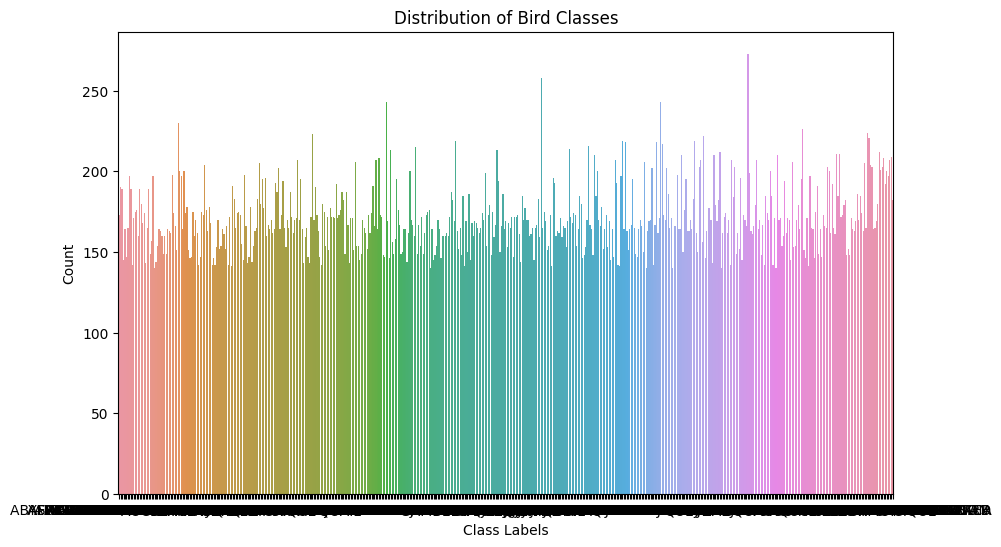

In [10]:
# Visualize the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=df)
plt.title('Distribution of Bird Classes')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

Some species or class ids have more images than the other, the distribution is random.

In [11]:
df["data set"].value_counts()

train    84635
test      2625
valid     2625
Name: data set, dtype: int64

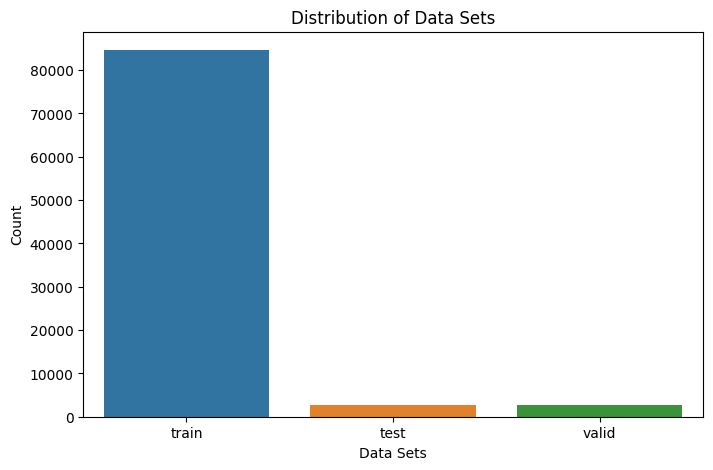

In [12]:
# Visualize the distribution of data sets
plt.figure(figsize=(8, 5))
sns.countplot(x='data set', data=df)
plt.title('Distribution of Data Sets')
plt.xlabel('Data Sets')
plt.ylabel('Count')
plt.show()

There are about 84,635 images in training dataset, 2,625 images in testing and validation datasets. The train-test split ratio, given the provided numbers, is approximately 97.5% for training (84,635 / (84,635 + 2,625)) and 2.5% for testing (2,625 / (84,635 + 2,625)).

Let's take a look at a few sample images from the dataset.

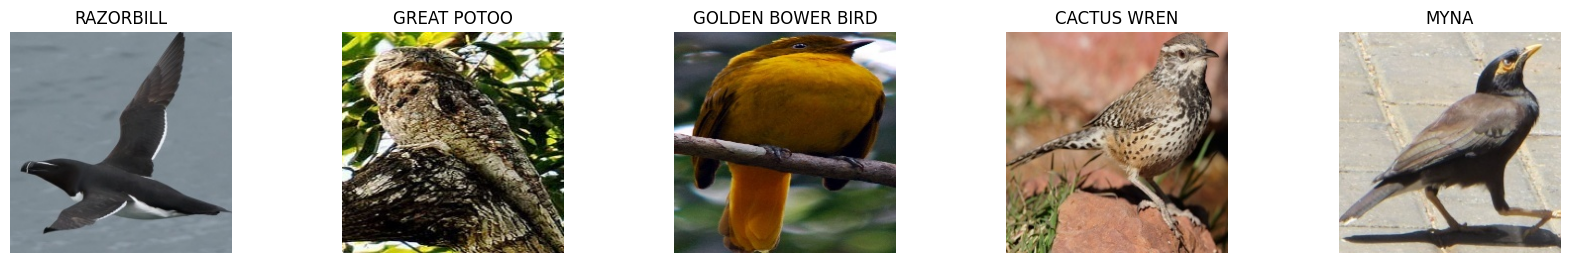

In [13]:
import random
from PIL import Image

# Select five random indices
random_indices = random.sample(range(len(df)), 5)

# Visualize five random bird images
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
fig.subplots_adjust(wspace=0.5)
for i, idx in enumerate(random_indices, 1):
    sample_image_path = df['filepaths'].iloc[idx]
    sample_image = Image.open(f"/content/birds-dataset/{sample_image_path}")

    axes[i - 1].imshow(sample_image)
    axes[i - 1].set_title(f'{df["labels"].iloc[idx]}')
    axes[i - 1].axis('off')

plt.show()


## Data cleaning

In this section, we focus on refining our dataset for bird species image classification. With 84,635 training images and 2,625 testing images at hand, the data cleaning process is crucial for eliminating duplicates, addressing defects, and ensuring a clean dataset free from information leakage. By maintaining image quality and rectifying gender distribution imbalances, we lay the groundwork for a reliable and effective machine learning model.

Let's start by checking for and removing any missing image entries. We'll be doing this by checking if the file exists at the filepath provided in `birds.csv`. If the file doesn't exist, we simply drop the row.


In [14]:
import os

# saving original dataframe
df_original = df.copy()

# adding new feature for if file exists at the file path
df['file_exists'] = df['filepaths'].apply(lambda x: os.path.exists(f"/content/birds-dataset/{x}"))
df.shape


(89885, 6)

In [15]:
df["file_exists"].value_counts()

True     89720
False      165
Name: file_exists, dtype: int64

There are only a few such files in comparison to original dataset. Hence, we can drop them.

In [16]:
df = df[df['file_exists'] == True].drop('file_exists', axis=1)

In [17]:
df.shape

(89720, 5)

The final dataset has 89,720 rows.

Next we'll standardize the images to a specific size to maintain consistency of data.

In [18]:
# saving another version of df
df_original_1 = df

In [19]:
import os

# Function to resize an image and save it to a new directory structure
def resize_and_save(image_path, target_size=(224, 224), output_folder='/content/resized-birds/'):
    img = Image.open(f"/content/birds-dataset/{image_path}")

    # Extract bird label/name from DataFrame
    bird_label = df[df['filepaths'] == image_path]['labels'].iloc[0]

    # Create 'resized-birds' directory if it doesn't exist
    output_directory = os.path.join(output_folder)
    os.makedirs(output_directory, exist_ok=True)

    # Create bird label subdirectory if it doesn't exist
    bird_directory = os.path.join(output_directory, bird_label)
    os.makedirs(bird_directory, exist_ok=True)

    # Resize image and save to the appropriate subdirectory
    img_resized = img.resize(target_size)
    resized_filepath = os.path.join(bird_directory, f"{image_path.split('/')[-1]}")
    img_resized.save(resized_filepath)
    return resized_filepath

# Apply the function to each row and save the resized paths in the new column
df['resized_filepaths'] = df['filepaths'].apply(lambda x: resize_and_save(x))

# Display the DataFrame with the original and resized file paths
df[['filepaths', 'resized_filepaths']]

# df["resized_filepaths"] = "/content/resized-birds/" + df["filepaths"].str[5:]
# df[["filepaths", "resized_filepaths"]]


,filepaths,resized_filepaths
0,train/ABBOTTS BABBLER/001.jpg,/content/resized-birds/ABBOTTS BABBLER/001.jpg
1,train/ABBOTTS BABBLER/007.jpg,/content/resized-birds/ABBOTTS BABBLER/007.jpg
2,train/ABBOTTS BABBLER/008.jpg,/content/resized-birds/ABBOTTS BABBLER/008.jpg
3,train/ABBOTTS BABBLER/009.jpg,/content/resized-birds/ABBOTTS BABBLER/009.jpg
4,train/ABBOTTS BABBLER/002.jpg,/content/resized-birds/ABBOTTS BABBLER/002.jpg
...,...,...
89880,valid/BLACK BREASTED PUFFBIRD/3.jpg,/content/resized-birds/BLACK BREASTED PUFFBIRD...
89881,valid/BLACK BREASTED PUFFBIRD/4.jpg,/content/resized-birds/BLACK BREASTED PUFFBIRD...
89882,valid/BLACK BREASTED PUFFBIRD/1.jpg,/content/resized-birds/BLACK BREASTED PUFFBIRD...
89883,valid/BLACK BREASTED PUFFBIRD/2.jpg,/content/resized-birds/BLACK BREASTED PUFFBIRD...


I've saved these resized images to a new folder instead of saving it in memory and attached the file path to a new feature of the `.csv` file.


Let's now remove any duplicates that may be present in the dataset to prevent information leakage and potential overfitting of the model. This can be done by simple comparing the hash checksum of the image. If the checksum repeats, images are identical else they are different from each other. We'll be using [`sha256()`](https://docs.python.org/3/library/hashlib.html#hashlib.sha256) method of the [hashlib](https://docs.python.org/3/library/hashlib.html) library for this purpose since it provides the highest accuracy but [`md5()`](https://docs.python.org/3/library/hashlib.html#hashlib.md5) can be used too.

In [20]:
import hashlib

def image_checksum(image_path):
    with open(f"{image_path}", 'rb') as f:
        return hashlib.sha256(f.read()).hexdigest()

df['checksum'] = df['resized_filepaths'].apply(lambda x: image_checksum(f"{x}"))

In [21]:
df.checksum.value_counts()

d58955101c953be51ced5a6d83975ce8369014873449d4b6c8c1ed2a2a88cbb9    3
6932b0b78faa233ecca0acdb1c146412c9260851a035913e3eeebc6f6631fbe7    3
815234603d65e19d48ef4cd3af34c0baa0fe7cf419f51ce6c3c609ca22473472    3
9656d02138f129a3fe64d169f29a3af5f628a15215b76ffa8ba291e9fc015506    3
a6b0bf636bdcfa11fb844b42d1e6c311dc10a82679f3b7351ca938bc880da255    3
                                                                   ..
78d8791073ce9d37f244ebb4dbac9123808650a61b6a806d10ad251368821356    1
ad40cc907cd0fbf533c7689eaf07e49aea3506bf219e9312773a89709de498f4    1
259f47c6f2c5df6312fa5bafcbd4c4c9daef8a30d366037e67a6058836a8902d    1
3507859a2beb6b3d83872609a4286d76548716466da23a30bd46ef5de3ad73be    1
4fd8005a21046f6af3b9e37efd249ed2a07c3e4c0dfe879a015a320f1822af4e    1
Name: checksum, Length: 87005, dtype: int64

This tells us that there are multiple checksums that repeat about 3 times, these maybe repeating in training, testing and valid datasets.

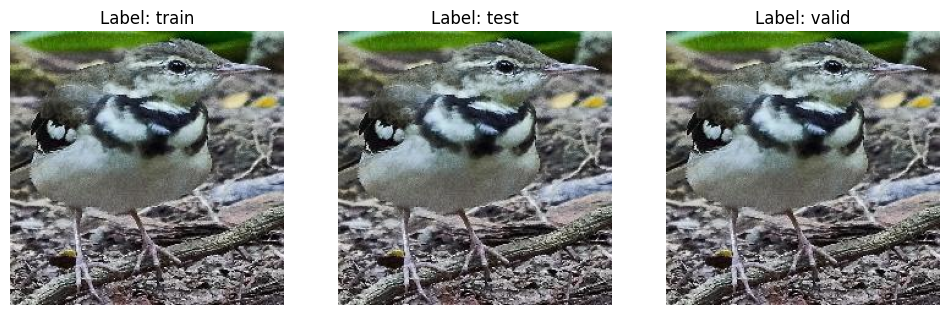

In [22]:
from PIL import Image

# A sample checksum with more than one counts
target_checksum = 'd58955101c953be51ced5a6d83975ce8369014873449d4b6c8c1ed2a2a88cbb9'

# Filter the DataFrame for the specified checksum
subset_df = df[df['checksum'] == target_checksum]

# Plot the images
plt.figure(figsize=(12, 6))
for i, (_, row) in enumerate(subset_df.iterrows()):
    plt.subplot(1, len(subset_df), i + 1)

    # Load and display the image
    image_path = row['resized_filepaths']
    img = Image.open(image_path)

    plt.imshow(img)
    plt.title(f'Label: {row["data set"]}')
    plt.axis('off')

plt.show()


As seen from the sample above of one of the checksums, the same image is being repeated in train, test and valid. This might cause information leakage and therefore must be removed.

In [23]:
df

,class id,filepaths,labels,data set,scientific name,resized_filepaths,checksum
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,/content/resized-birds/ABBOTTS BABBLER/001.jpg,c3fbb5f185a411674e3e28f7e48447c38b550083da7400...
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,/content/resized-birds/ABBOTTS BABBLER/007.jpg,4283201bcef18d1c6a439c4b4b6c328c59aeaf1c587cad...
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,/content/resized-birds/ABBOTTS BABBLER/008.jpg,db1e7776c3a94fb6b54ec010376058bf7aeab5931cc0b3...
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,/content/resized-birds/ABBOTTS BABBLER/009.jpg,405ab80c7f59c5b590ff8783f3a6f1994688485a93bcee...
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI,/content/resized-birds/ABBOTTS BABBLER/002.jpg,bc64ac6b915c8f701de179c3a3dfb729ab58baaae8a94c...
...,...,...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,/content/resized-birds/BLACK BREASTED PUFFBIRD...,4e868aab80cf11b88204618dfe8d6fd717b8b669f91c4b...
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,/content/resized-birds/BLACK BREASTED PUFFBIRD...,dd643cd1162de483d9294b4d12165728d325f5e110f088...
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,/content/resized-birds/BLACK BREASTED PUFFBIRD...,3c269a808f6b74bdc3e91cadbe9350ff4164dc918e29f5...
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS,/content/resized-birds/BLACK BREASTED PUFFBIRD...,62d3ca4e60d831b82cbcc8e1c2d017128bf238c2519909...


In [24]:
df_cleaned_1 = df.drop_duplicates(subset='checksum').copy()
df_cleaned_1.shape

(87005, 7)

In [25]:
df_cleaned_1["data set"].value_counts()

train    84480
test      2525
Name: data set, dtype: int64

Now the data should not have any duplicates.

In [26]:
df_cleaned_2 = df_cleaned_1.drop(columns=["data set", "checksum"], axis=1)

## Splitting dataset into training and testing and validation set

Since we removed the dataset column earlier, we have to split the data into training, testing and validation datasets. We will be using a stratified split to ensure each class is represented properly in each of the datasets. This can be done by using the `stratify` parameter of `train_test_split()` function.

In [27]:
from sklearn.model_selection import train_test_split


# Split the data into 70% train and 30% temp (which will be further split into 15% test and 15%
train_df, temp_df = train_test_split(df_cleaned_2, test_size=0.3, random_state=42, stratify=df_cleaned_2['labels'])

# Split the remaining 30% into 50% test and 50% validation while preserving label distribution
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['labels'])

I have split the data into 70:15:15 kind of form.

### Image data augmentation and making generators


 Data augmentation is a technique to enhance our training dataset by applying transformations like rotations and flips to existing images, making our model more robust. The `ImageDataGenerator` in Keras simplifies this process, enabling dynamic augmentation during training. This helps our CNN generalize better to various scenarios, making it a crucial tool for improving model performance.

Organizing the data properly:

In [28]:
import shutil

def move_images(df, src, dest_base):
    for index, row in df.iterrows():
        img_path = os.path.join(src, row['resized_filepaths'])
        label_folder = row['labels']
        dest_path = os.path.join(dest_base, label_folder)
        dest_file_path = os.path.join(dest_path, row['resized_filepaths'].split('/')[-1])

        if not os.path.exists(dest_path):
            os.makedirs(dest_path)

        shutil.copy(img_path, dest_file_path)

# Move resized images to the 'train' folder
move_images(train_df, "/content/resized-birds", "/content/dataset/train")

# Move resized images to the 'test' folder
move_images(test_df, "/content/resized-birds", "/content/dataset/test")

# Move resized images to the 'valid' folder
move_images(val_df, "/content/resized-birds", "/content/dataset/valid")

Using `ImageDataGenerator` for augmentation purposes and to make generators:

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


augmented_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

general_datagen = ImageDataGenerator(rescale = 1./255) # for training, validation and testing data

# Use flow_from_dataframe to load and augment training images
train_generator = general_datagen.flow_from_directory(
    directory="/content/dataset/train",
    target_size = (224, 224), # Size of the images (adjust as needed)
    batch_size = 32,  # Batch size for training
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)
valid_generator = general_datagen.flow_from_directory(
    directory="/content/dataset/valid",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)
test_generator = general_datagen.flow_from_directory(
    directory="/content/dataset/test",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 60903 images belonging to 524 classes.
Found 13051 images belonging to 524 classes.
Found 13051 images belonging to 524 classes.


The `augmented_gen` is configured to rescale pixel values, apply rotations up to 40 degrees, horizontal shifts, vertical shifts, zooming, and horizontal flips. The `general_datagen` is used for loading and preprocessing training, validation, and testing images by rescaling pixel values. The `flow_from_directory` method is then employed to generate augmented batches of images from specified directories for training (`train_generator`), validation (`valid_generator`), and testing (`test_generator`). Each generator is configured to target images of size (224, 224) and employs categorical class mode for multi-class classification tasks. This comprehensive setup ensures effective data augmentation during the training process, enhancing the CNN's ability to generalize across diverse image variations.

Plotting a sample using the generator:

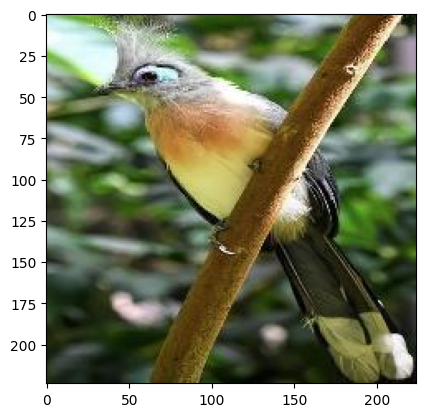

In [30]:
# ploting a sample from my data
def plot_image(generator):
    images_in_batch = next(generator) # images_in_batch will output (batch_size, height, width, n_channels)
    img = images_in_batch[0][0] # img will output (height, width, n_channels)

    plt.imshow(img)

plot_image(train_generator)

## Model 1: CNN:

The Convolutional Neural Network (CNN) serves as a cornerstone in image processing and computer vision. This specialized neural network architecture is designed to automatically and adaptively learn spatial hierarchies of features from input images. Through the use of convolutional layers, the CNN effectively captures patterns and features, making it particularly potent for tasks like image classification and object detection. These layers are followed by pooling operations, which reduce dimensionality while retaining essential information. The network concludes with fully connected layers that leverage the learned features for making accurate predictions. CNNs have revolutionized the field of deep learning, proving indispensable in tasks ranging from facial recognition to medical image analysis. In the upcoming sections, we will delve into the implementation and training of a CNN for a specific task, harnessing its powerful capabilities to extract meaningful insights from visual data.

I'll be using `tensorflow.keras` for this, TensorFlow's Keras is a high-level neural networks API that facilitates streamlined and efficient development of deep learning models. As an integral component of the TensorFlow ecosystem, Keras simplifies the process of building, training, and deploying neural networks. Known for its user-friendly interface and modular design, Keras allows developers to prototype and experiment with neural network architectures with remarkable ease.

Importing required libraries for CNN:

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

#### Model architecture:

In [46]:
# variables used to determine steps_per_epoch in the model
train_groups = len(train_generator)
valid_groups = len(valid_generator) # validation_step

print(f"Train groups: {train_groups}")
print(f"Validation groups: {valid_groups}")

Train groups: 1904
Validation groups: 408


In [34]:
def conv_layer(inputs, filters, kernel_size=3, padding="valid"):

    # Create a convolutional layer with batch normalization and ReLU activation.

    x = layers.Conv2D(filters=filters, kernel_size=kernel_size, padding=padding, use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    return x

def pooling_layer(inputs, pool_size=2, dropout_rate=0.5):

    # Create a pooling layer with max pooling, batch normalization, and dropout.

    x = layers.MaxPooling2D(pool_size=pool_size)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    return x

def dense_layer(inputs, out, dropout_rate=0.5):

    # Create a dense layer with batch normalization, ReLU activation, and dropout.

    x = layers.Dense(out)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(dropout_rate)(x)

    return x


These are the functions that will be used for creating conv, pooling and dense layers

In [35]:
# Clear previous Keras session to start with a clean slate
keras.backend.clear_session()

# Define input shape for the model
inputs = keras.Input(shape=(224, 224, 3))

# Block 1:  64 filters, padding "same", and pooling
x = conv_layer(inputs, 64, padding="same")  # 224x224
x = conv_layer(x, 64)  # 222x222
x = pooling_layer(x)  # 111x111

# Block 2: 64 filters, padding "same", and pooling
x = conv_layer(x, 64, padding="same")  # 111x111
x = conv_layer(x, 64)  # 109x109
x = pooling_layer(x)  # 54x54

# Block 3: 64 filters, padding "same", and pooling
x = conv_layer(x, 64, padding="same")  # 54x54
x = conv_layer(x, 64)  # 52x52
x = pooling_layer(x)  # 26x26

# Block 4: 64 filters and padding "same"
x = conv_layer(x, 64, padding="same")  # 26x26

# Flatten layer
x = layers.Flatten()(x)  # 26*26*64

# Fully connected layer with 512 units
x = dense_layer(x, 512)

# Output layer with softmax activation for multi-class classification
outputs = layers.Dense(524, activation="softmax")(x)

# Create the base model using the defined architecture
base_model = keras.Model(inputs, outputs)

# Display the model summary
base_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1728      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36864     
                                                                 
 batch_normalization_1 (Bat  (None, 222, 222, 64)      256       
 chNormalization)                                            

The network architecture is organized into four blocks, each comprising two convolutional layers with 64 filters, followed by either a pooling layer or a padding layer, and concluding with a flattening operation. The first three blocks progressively reduce spatial dimensions through max-pooling, resulting in feature maps of dimensions 111x111, 54x54, and 26x26, respectively. The fourth block maintains a spatial dimension of 26x26 with padding. The flattened output is then fed into a fully connected layer with 512 units, incorporating batch normalization, ReLU activation, and dropout. The final output layer consists of 524 units with a softmax activation function, suitable for multi-class classification tasks. The model is instantiated as `base_model` and its architecture is summarized. It has 22,648,012 total params which are divided into 22,645,708 trainable and 2,304 non-trainable params.

#### Model training:

In [ ]:
# Compile the base model with Adam optimizer, categorical crossentropy loss, and accuracy metric
base_model.compile(
    optimizer=keras.optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model using training and validation generators
with tf.device('/device:GPU:0'):
  history = base_model.fit(
      train_generator,
      steps_per_epoch=train_groups,
      epochs=20,
      validation_data=valid_generator,
      validation_steps=valid_groups,
      verbose=1,
      callbacks=[
          # Early stopping to prevent overfitting and restore best weights
          keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
          # Reduce learning rate on plateaus to fine-tune the model
          keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, verbose=1),
          # Save the best model checkpoint based on validation loss
          keras.callbacks.ModelCheckpoint(
              filepath="intial_model.keras",
              save_best_only=True,
              monitor="val_loss"
          )
      ]
  )


Epoch 1/20
1904/1904 [==============================] - 780s 407ms/step - loss: 2.9644 - accuracy: 0.3548 - val_loss: 2.3934 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 2/20
1904/1904 [==============================] - 776s 408ms/step - loss: 2.2992 - accuracy: 0.4735 - val_loss: 2.0870 - val_accuracy: 0.5262 - lr: 0.0010
Epoch 3/20
1904/1904 [==============================] - 776s 407ms/step - loss: 1.8656 - accuracy: 0.5549 - val_loss: 1.9755 - val_accuracy: 0.5523 - lr: 0.0010
Epoch 4/20
1904/1904 [==============================] - 776s 408ms/step - loss: 1.5134 - accuracy: 0.6231 - val_loss: 1.9258 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 5/20
1904/1904 [==============================] - 775s 407ms/step - loss: 1.2099 - accuracy: 0.6885 - val_loss: 1.9426 - val_accuracy: 0.5609 - lr: 0.0010
Epoch 6/20
1904/1904 [==============================] - 777s 408ms/step - loss: 0.9734 - accuracy: 0.7384 - val_loss: 1.8946 - val_accuracy: 0.5751 - lr: 0.0010
Epoch 7/20
1904/1904 [============

`base_model` is compiled using the Adam optimizer with a learning rate of 0.001, categorical crossentropy as the loss function (because we are performing classification on basis of multiple categories), and accuracy as the metric to monitor during training. The model is then trained using the specified training and validation data generators (`train_generator` and `valid_generator`). The training process is set to run for 20 epochs, with various callbacks employed to enhance model training. Early stopping is implemented to prevent overfitting by monitoring the validation accuracy and restoring the best weights. The learning rate is dynamically adjusted using the ReduceLROnPlateau callback, which reduces the learning rate by a factor of 0.7 if the validation loss plateaus for two consecutive epochs. Additionally, the ModelCheckpoint callback saves the best model checkpoint based on validation loss, providing a mechanism to retrieve the optimal model configuration. The entire training history is stored in the `history` variable for further analysis or visualization. The training is accelerated using GPU acceleration (`'/device:GPU:0'`).

### Model evaluation

In [93]:
# Evaluate the best model on the test set
test_loss_base, test_acc_base = base_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc_base * 100:.2f}%')

408/408 [==============================] - 17s 42ms/step - loss: 1.9196 - accuracy: 0.5998
Test Accuracy: 59.98%


In [88]:
%cp -av "/content/drive/MyDrive/Colab Notebooks/birds-archivveveve/models/intial_model.keras" "/content"
%cp -av "/content/drive/MyDrive/Colab Notebooks/birds-archivveveve/models/my_history.npy" "/content"

'/content/drive/MyDrive/Colab Notebooks/birds-archivveveve/models/intial_model.keras' -> '/content/intial_model.keras'
'/content/drive/MyDrive/Colab Notebooks/birds-archivveveve/models/my_history.npy' -> '/content/my_history.npy'


In [89]:
base_model = keras.models.load_model('/content/intial_model.keras')
history = np.load('/content/my_history.npy', allow_pickle='TRUE').item()

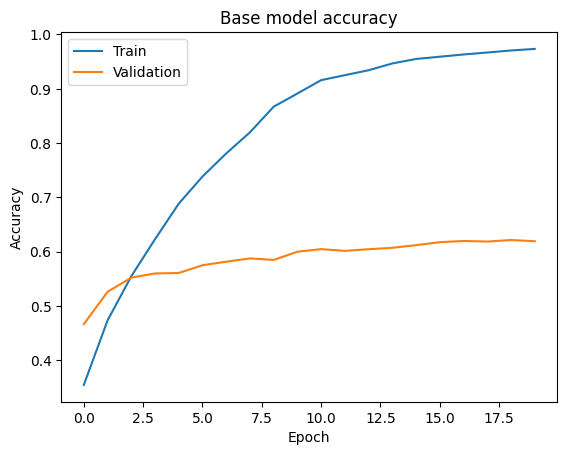

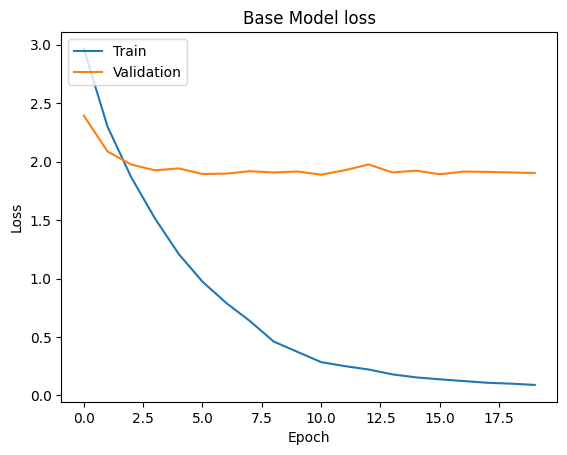

In [44]:
# Plot training & validation accuracy values for the best model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for the best model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Base Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The graph shows gradual increase in both training and validation accuracy but the validation accuracy is lower than training accuracy which might suggest overfitting. The loss is also decreasing gradually over multiple epochs.

In [94]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

with tf.device('/device:GPU:0'):
  for batch in range(len(test_generator)):
      X, y = test_generator[batch]
      y_pred = base_model.predict(X)

      # Update metric states
      pre.update_state(y, y_pred)
      re.update_state(y, y_pred)

# Get the final results after processing all batches
precision_base = pre.result().numpy()
recall_base = re.result().numpy()

print(f"Precision: {precision_base:.4f}")
print(f"Recall: {recall_base:.4f}")

1/1 [==============================] - 0s 197ms/step
Precision: 0.7472
Recall: 0.5436


1. Precision (0.7472):

* Precision is the ratio of true positive predictions to the total predicted positives. In this case, a precision of 0.7472 means that when the model predicts a positive outcome, it is correct about 74.72% of the time. This indicates a moderate rate of false positives.

2. Recall (0.5436):

* Recall (sensitivity) measures the ability of the model to capture all relevant examples. A recall of 0.5436 means that the model is able to correctly identify about 54.36% of all the actual positive instances. This suggests a relatively low rate of true positives and a higher rate of false negatives.

3. Test Accuracy (59.98%):

* Test accuracy represents the overall correctness of the model. An accuracy of 59.98% indicates that the model is correct about 59.98% of the time on the test set. This is a moderate level of accuracy.

## Model 2: MobileNet:

Let's try training our model using transfer learning:

We'll be using MobileNet as our base model for this and train it on our dataset.

In [60]:
# Clear the Keras session to start with a clean slate
keras.backend.clear_session()

# Load the pre-trained MobileNet model with ImageNet weights
base_mobilenet = keras.applications.MobileNet(
    weights='imagenet',
    include_top=False,  # Exclude the fully-connected layer at the top
    input_shape=(224, 224, 3)  # Specify input shape for the model
)

# Freeze the weights of the pre-trained MobileNet base
base_mobilenet.trainable = False

# Define the input layer for the new model
inputs = keras.Input(shape=(224, 224, 3))

# Connect the input to the pre-trained MobileNet base
x = base_mobilenet(inputs)

# Flatten the output of the base model to a 1D tensor
x = layers.Flatten()(x)

# Add a dense layer with 512 units using a custom dense_layer function
x = dense_layer(x, 512)

# Output layer with softmax activation for multi-class classification
outputs = layers.Dense(524, activation="softmax")(x)

# Create the final MobileNet-based model
mobilenet_model = keras.Model(inputs, outputs)

17225924/17225924 [==============================] - 1s 0us/step


The pre-trained MobileNet is used as a feature extractor, and a custom classifier is added on top for a specific classification task.

MobileNet Initialization:

The MobileNet model is loaded with pre-trained weights from ImageNet. It is configured to exclude the fully-connected layer at the top and set an input shape of (224, 224, 3).
Freezing Base MobileNet Weights:

The weights of the pre-trained MobileNet base are frozen to prevent them from being updated during training, as we want to retain the knowledge gained from ImageNet.
Model Definition:

The new model is defined by connecting the input to the MobileNet base, followed by a Flatten layer to convert the 3D tensor to a 1D tensor. A custom dense layer with 512 units is added, and the final output layer is a Dense layer with a softmax activation function for multi-class classification.

In [62]:
# Compile the MobileNet-based model with specified optimizer, loss function, and metrics
mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Define callbacks to monitor and control the training process
callbacks = [
    # EarlyStopping stops training when a monitored metric has stopped improving
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),

    # ReduceLROnPlateau reduces the learning rate when a metric has stopped improving
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, verbose=1),

    # ModelCheckpoint saves the model when a monitored metric has improved, creating checkpoints
    keras.callbacks.ModelCheckpoint(filepath="mobilenet_model.keras", save_best_only=True, monitor="val_loss")
]

# Train the MobileNet-based model using the fit method
history_mNet = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=train_groups,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_groups,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/20
1904/1904 [==============================] - 107s 55ms/step - loss: 3.3209 - accuracy: 0.5354 - val_loss: 2.5718 - val_accuracy: 0.7838 - lr: 0.0010
Epoch 2/20
1904/1904 [==============================] - 96s 51ms/step - loss: 2.7996 - accuracy: 0.7443 - val_loss: 2.8962 - val_accuracy: 0.7956 - lr: 0.0010
Epoch 3/20
1903/1904 [============================>.] - ETA: 0s - loss: 2.9330 - accuracy: 0.7668
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
1904/1904 [==============================] - 102s 53ms/step - loss: 2.9332 - accuracy: 0.7668 - val_loss: 3.0310 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 4/20
1904/1904 [==============================] - 116s 61ms/step - loss: 2.4566 - accuracy: 0.8289 - val_loss: 2.5234 - val_accuracy: 0.8206 - lr: 7.0000e-04
Epoch 5/20
1904/1904 [==============================] - 110s 58ms/step - loss: 2.2538 - accuracy: 0.8418 - val_loss: 2.4833 - val_accuracy: 0.8184 - lr: 7.0000e-04
Epoch 6/20
1904/1904 [========

After training the MobileNet-based model for 20 epochs, we observed the following trends in the training and validation metrics. The initial training loss was 3.32 with an accuracy of 53.54%, and the validation loss was 2.57 with an accuracy of 78.38%. As the training progressed, the model achieved higher accuracies on both training and validation sets. Notably, the ReduceLROnPlateau callback adjusted the learning rate during training to enhance model convergence. The model demonstrated improved generalization and achieved a final validation accuracy of 85.54% with a corresponding loss of 1.48. Additionally, early stopping was employed to prevent overfitting, and the best model was saved using ModelCheckpoint. Overall, the training process resulted in a well-performing MobileNet-based model for the given task.

### Model Evaluation:

In [85]:
# Evaluate the best model on the test set
test_loss_mNet, test_acc_mNet = mobilenet_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc_mNet * 100:.2f}%')

408/408 [==============================] - 21s 51ms/step - loss: 1.5190 - accuracy: 0.8506
Test Accuracy: 85.06%


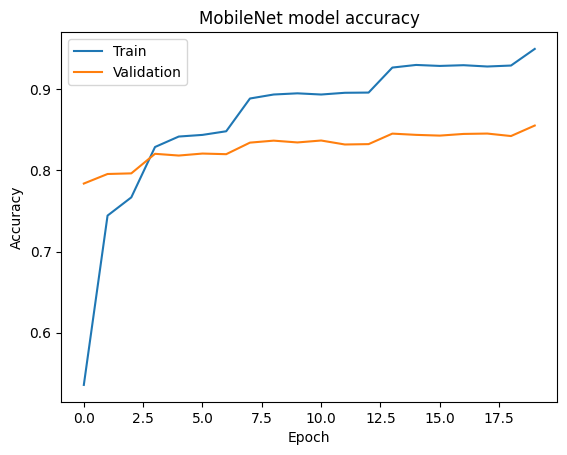

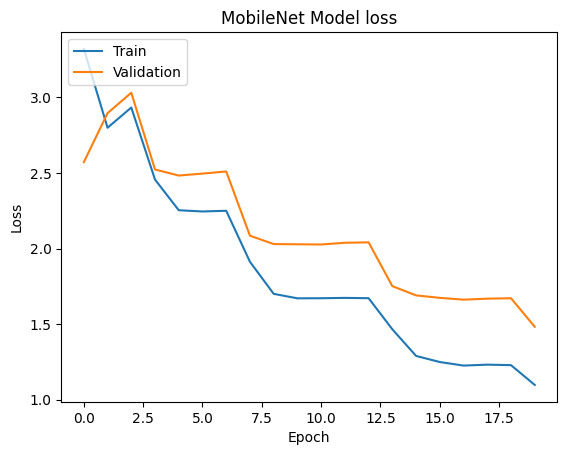

In [65]:
# Plot training & validation accuracy values for the best model
plt.plot(history_mNet.history['accuracy'])
plt.plot(history_mNet.history['val_accuracy'])
plt.title('MobileNet model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for the best model
plt.plot(history_mNet.history['loss'])
plt.plot(history_mNet.history['val_loss'])
plt.title('MobileNet Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The training accuracy seems to be gradually increasing, it increases faster initially but slows down after about 5 epochs, validation accuracy has a more gradual increase but looks mostly linear. Training accuracy is a little higher than validation accuracy which may suggest a little bit of overfitting but it is close. The losses for both training and accuracy show an almost linear decrease.

We will be using keras.metrics to evaluate our model further. We will be using the metrics: Precision and Recall  for this purpose.

In [86]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

with tf.device('/device:GPU:0'):
  for batch in range(len(test_generator)):
      X, y = test_generator[batch]
      y_pred = mobilenet_model.predict(X)

      # Update metric states
      pre.update_state(y, y_pred)
      re.update_state(y, y_pred)

# Get the final results after processing all batches
precision_mNet = pre.result().numpy()
recall_mNet = re.result().numpy()

print(f"Precision: {precision_mNet:.4f}")
print(f"Recall: {recall_mNet:.4f}")

1/1 [==============================] - 0s 29ms/step
Precision: 0.8921
Recall: 0.8305


>1. Precision (0.8921):
>
>* Precision is the ratio of true positive predictions to the total predicted positives. In this case, a precision of 0.8921 means that when the model predicts a positive outcome, it is correct about 89.21% of the time. This indicates a relatively low rate of false positives.
>2. Recall (0.8305):
>
>* Recall (sensitivity) measures the ability of the model to capture all relevant examples. A recall of 0.8305 means that the model is able to correctly identify about 83.05% of all the actual positive instances. This suggests a relatively low rate of false negatives.
>3. Test Accuracy (85.06%):
>
>* Test accuracy represents the overall correctness of the model. An accuracy of 85.06% indicates that the model is correct about 85.06% of the time on the test set. This is a relatively high level of accuracy.

In summary, these metrics suggest that the second CNN model has high precision, recall, and test accuracy. The model performs well in correctly identifying positive instances (low false positives) and capturing most of the actual positive instances (low false negatives). The overall accuracy is also high. This indicates that the second model is effective in making accurate predictions on the given task.

## Model 3: VGG16

The VGG16 (Visual Geometry Group 16) model is a deep convolutional neural network architecture that gained prominence for its simplicity and effectiveness in image classification tasks. Developed by the Visual Geometry Group at the University of Oxford, VGG16 consists of 16 weight layers, including 13 convolutional layers and 3 fully connected layers. The architecture's distinctive feature is the use of small 3x3 convolutional filters throughout the network, which allows for a deeper network without an excessive increase in parameters. VGG16 has been widely used as a feature extractor in transfer learning scenarios, where pre-trained weights on large datasets, such as ImageNet, are fine-tuned for specific image recognition tasks. Its straightforward architecture and strong performance make VGG16 a popular choice in computer vision applications and a valuable tool for researchers and practitioners alike. We will be using this for classification now.

In [96]:
# Clear the previous Keras session to start with a clean slate
keras.backend.clear_session()

# Load the VGG16 convolutional base with pre-trained weights from ImageNet
conv_base_vgg16 = keras.applications.vgg16.VGG16(
    include_top=False,  # Exclude the fully connected layers at the top
    weights="imagenet",  # Use pre-trained ImageNet weights
    input_shape=(224, 224, 3)  # Set input shape as per the model requirements
)

# Set the convolutional base to be non-trainable, treating it as a feature extractor
conv_base_vgg16.trainable = False

# Define the input layer for the model
inputs = keras.Input(shape=(224, 224, 3))

# Connect the input to the VGG16 convolutional base
x = conv_base_vgg16(inputs)

# Flatten the output of the VGG16 convolutional base
x = layers.Flatten()(x)

# Apply a dense layer with 512 units to capture complex patterns
x = dense_layer(x, 512)

# Create the output layer with softmax activation for multi-class classification
outputs = layers.Dense(524, activation="softmax")(x)

# Create the VGG16-based model using the defined architecture
vgg16_model = keras.Model(inputs, outputs)

# Display the summary of the VGG16-based model
vgg16_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                             

 The pre-trained VGG16 convolutional base, with weights from ImageNet, serves as a feature extractor. The base is set to be non-trainable to preserve its pre-learned features. The model extends with a flattening layer followed by a dense layer with 512 units, capturing intricate patterns. The output layer, utilizing softmax activation, is configured for multi-class classification with 524 classes. This VGG16-based model is defined, and its architecture is summarized, showcasing the layer-wise configuration, parameter counts, and the overall structure. The non-trainable convolutional base ensures leveraging ImageNet's learned features while fine-tuning the subsequent layers for the specific classification task.

Training the model:

In [97]:
# Compile the VGG16-based model with specified optimizer, loss function, and metrics
vgg16_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Define callbacks to monitor and control the training process
callbacks = [
    # EarlyStopping stops training when a monitored metric has stopped improving
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),

    # ReduceLROnPlateau reduces the learning rate when a metric has stopped improving
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, verbose=1),

    # ModelCheckpoint saves the model when a monitored metric has improved, creating checkpoints
    keras.callbacks.ModelCheckpoint(filepath="vgg16_model.keras", save_best_only=True, monitor="val_loss")
]

with tf.device('/device:GPU:0'):
  # Train the VGG16-based model using the fit method
  history_vgg16 = vgg16_model.fit(
      train_generator,
      steps_per_epoch=train_groups,
      epochs=20,
      validation_data=valid_generator,
      validation_steps=valid_groups,
      verbose=1,
      callbacks=callbacks
  )


Epoch 1/20
1904/1904 [==============================] - 109s 55ms/step - loss: 4.4214 - accuracy: 0.2404 - val_loss: 3.0781 - val_accuracy: 0.5059 - lr: 0.0010
Epoch 2/20
1904/1904 [==============================] - 101s 53ms/step - loss: 3.2703 - accuracy: 0.4845 - val_loss: 3.0498 - val_accuracy: 0.5698 - lr: 0.0010
Epoch 3/20
1904/1904 [==============================] - 100s 52ms/step - loss: 3.1446 - accuracy: 0.5551 - val_loss: 3.1153 - val_accuracy: 0.5878 - lr: 0.0010
Epoch 4/20
1904/1904 [==============================] - ETA: 0s - loss: 3.0999 - accuracy: 0.5887
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
1904/1904 [==============================] - 103s 54ms/step - loss: 3.0999 - accuracy: 0.5887 - val_loss: 3.1533 - val_accuracy: 0.6085 - lr: 0.0010
Epoch 5/20
1904/1904 [==============================] - 103s 54ms/step - loss: 2.6417 - accuracy: 0.6695 - val_loss: 2.8271 - val_accuracy: 0.6411 - lr: 7.0000e-04
Epoch 6/20
1904/1904 [===========

The model exhibits a decrease in training loss and an increase in training accuracy, indicating learning from the training data. The validation metrics, specifically validation loss and accuracy, are monitored, and the model achieves a stable validation accuracy around 68-69%. Learning rate adjustments are implemented during training, highlighting a strategy to fine-tune the model over epochs. Further analysis, such as visualizing training curves and evaluating performance on a test set, may provide additional insights into the model's behavior and generalization capabilities.

In [98]:
# Evaluate the best model on the test set
test_loss_vgg16, test_acc_vgg16 = vgg16_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc_vgg16 * 100:.2f}%')

408/408 [==============================] - 18s 45ms/step - loss: 2.3793 - accuracy: 0.6834
Test Accuracy: 68.34%


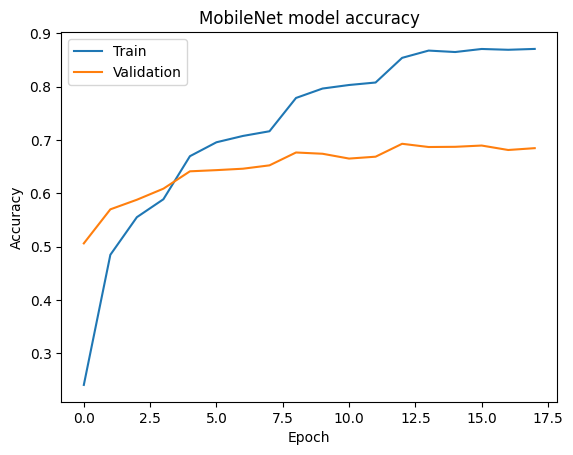

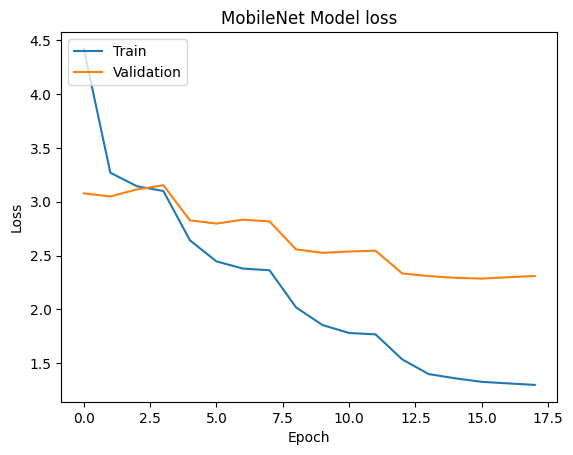

In [99]:
# Plot training & validation accuracy values for the best model
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('vgg16 model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for the best model
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('vgg16 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We see a gradual increase in the training accuracy of the model, the rate of increase seems constant but is fast for the first 5 epochs and slows down later. The validation accuracy also seems to be having a gradual increase but looks like it plateaus at after about the 6th epcoh, the increase is super slow and looks like it plateau-d.

In [100]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

with tf.device('/device:GPU:0'):
  for batch in range(len(test_generator)):
      X, y = test_generator[batch]
      y_pred = vgg16_model.predict(X)

      # Update metric states
      pre.update_state(y, y_pred)
      re.update_state(y, y_pred)

# Get the final results after processing all batches
precision_vgg16 = pre.result().numpy()
recall_vgg16 = re.result().numpy()

print(f"Precision: {precision_vgg16:.4f}")
print(f"Recall: {recall_vgg16:.4f}")

1/1 [==============================] - 0s 175ms/step
Precision: 0.8196
Recall: 0.6243


>1. Precision (0.8196):
>
>* Precision is the ratio of true positive predictions to the total predicted positives. A precision of 0.8196 means that when the model predicts a positive outcome, it is correct about 81.96% of the time. This indicates a relatively low rate of false positives.
>2. Recall (0.6243):
>
>* Recall (sensitivity) measures the ability of the model to capture all relevant examples. A recall of 0.6243 means that the model is able to correctly identify about 62.43% of all the actual positive instances. This suggests a moderate rate of true positives and a higher rate of false negatives.
>3. Test Accuracy (68.34%):
>
>* Test accuracy represents the overall correctness of the model. An accuracy of 68.34% indicates that the model is correct about 68.34% of the time on the test set

This model demonstrates a relatively high precision, indicating a low rate of false positives. However, the recall is moderate, suggesting a higher rate of false negatives. The overall accuracy on the test set is 68.34%. Comparing with the first and second models, the third model exhibits similar precision to the second model but with lower recall. The test accuracy is also lower than the second model but higher than the first model. These variations in performance metrics highlight the trade-offs and differences in the models' abilities to correctly classify instances, emphasizing the importance of considering precision, recall, and accuracy collectively for a comprehensive evaluation.

## Model 4: Inception

The InceptionV3 model, developed by Google, is a powerful deep learning architecture designed for image recognition tasks. Renowned for its effectiveness in the ImageNet Large Scale Visual Recognition Challenge, InceptionV3 employs a unique module called the "Inception module" that allows the model to capture features at multiple spatial scales. This architecture is characterized by its ability to balance model depth and computational efficiency, making it well-suited for a wide range of computer vision applications. The InceptionV3 model has been pre-trained on a large dataset called ImageNet, which enables it to learn diverse and abstract features, making it an excellent choice for transfer learning in various image classification tasks. The code snippet provided here harnesses the pre-trained InceptionV3 base, freezes its weights, and extends the model to suit a specific multi-class classification problem. This approach allows practitioners to leverage the knowledge encoded in InceptionV3 while tailoring the model to their specific image recognition needs. We will be using it as our 4th model.

In [103]:
# Clear the Keras session to start with a clean slate
keras.backend.clear_session()

# Load the pre-trained InceptionV3 model with ImageNet weights
base_inception = keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,  # Exclude the fully-connected layer at the top
    input_shape=(224, 224, 3)  # Specify input shape for the model
)

# Freeze the weights of the pre-trained InceptionV3 base
base_inception.trainable = False

# Define the input layer for the new model
inputs = keras.Input(shape=(224, 224, 3))

# Connect the input to the pre-trained InceptionV3 base
x = base_inception(inputs)

# Flatten the output of the base model to a 1D tensor
x = layers.Flatten()(x)

# Add a dense layer with 512 units using a custom dense_layer function
x = dense_layer(x, 512)

# Output layer with softmax activation for multi-class classification
outputs = layers.Dense(524, activation="softmax")(x)

# Create the final InceptionV3-based model
inception_model = keras.Model(inputs, outputs)

# Display the summary of the InceptionV3-based model
inception_model.summary()


87910968/87910968 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 batch_normalization_94 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 activation_94 (Activation)  (None, 512)               0      

The InceptionV3 model, pre-trained on the ImageNet dataset, serves as a convolutional base. The weights of this base are frozen to retain the pre-trained knowledge. The model architecture extends with a flattening layer and a dense layer containing 512 units. The output layer employs softmax activation for multi-class classification with 524 classes. This new InceptionV3-based model is then defined and summarized, showcasing its layer-wise configuration, parameter counts, and overall structure in the summary display. The non-trainable nature of the pre-trained base ensures the retention of valuable image features learned from ImageNet during the fine-tuning process.

In [104]:
# Compile the InceptionV3-based model with specified optimizer, loss function, and metrics
inception_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Define callbacks to monitor and control the training process
callbacks_inception = [
    # EarlyStopping stops training when a monitored metric has stopped improving
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),

    # ReduceLROnPlateau reduces the learning rate when a metric has stopped improving
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, verbose=1),

    # ModelCheckpoint saves the model when a monitored metric has improved, creating checkpoints
    keras.callbacks.ModelCheckpoint(filepath="inception_model.keras", save_best_only=True, monitor="val_loss")
]

with tf.device('/device:GPU:0'):
  # Train the InceptionV3-based model using the fit method
  history_inception = inception_model.fit(
      train_generator,
      steps_per_epoch=train_groups,
      epochs=20,
      validation_data=valid_generator,
      validation_steps=valid_groups,
      verbose=1,
      callbacks=callbacks_inception
  )


Epoch 1/20
1904/1904 [==============================] - 114s 57ms/step - loss: 3.3567 - accuracy: 0.4020 - val_loss: 2.4860 - val_accuracy: 0.6256 - lr: 0.0010
Epoch 2/20
1904/1904 [==============================] - 106s 56ms/step - loss: 2.8787 - accuracy: 0.5540 - val_loss: 2.5610 - val_accuracy: 0.6552 - lr: 0.0010
Epoch 3/20
1903/1904 [============================>.] - ETA: 0s - loss: 2.8697 - accuracy: 0.5782
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
1904/1904 [==============================] - 97s 51ms/step - loss: 2.8696 - accuracy: 0.5782 - val_loss: 2.5653 - val_accuracy: 0.6621 - lr: 0.0010
Epoch 4/20
1904/1904 [==============================] - 106s 56ms/step - loss: 2.4598 - accuracy: 0.6389 - val_loss: 2.2151 - val_accuracy: 0.7026 - lr: 7.0000e-04
Epoch 5/20
1904/1904 [==============================] - 107s 56ms/step - loss: 2.3530 - accuracy: 0.6540 - val_loss: 2.2167 - val_accuracy: 0.6986 - lr: 7.0000e-04
Epoch 6/20
1904/1904 [========

The InceptionV3-based model underwent a comprehensive learning process for an image classification task. The model demonstrated a progressive reduction in training loss and an increase in training accuracy, indicative of effective learning from the provided training data. Concurrently, the validation metrics, including loss and accuracy, were meticulously tracked. The model achieved a consistent and stable validation accuracy, peaking at 77.90% during the 20th epoch. Notably, learning rate adjustments were strategically incorporated throughout training, underscoring a deliberate fine-tuning approach to enhance model performance over successive epochs. Akin to the aforementioned model analysis, further exploration through visualizing training curves and rigorous evaluation on a test set could yield deeper insights into the model's behavior and its ability to generalize across diverse data instances.

In [106]:
# Evaluate the best Inception model on the test set
test_loss_inception, test_acc_inception = inception_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc_inception * 100:.2f}%')


408/408 [==============================] - 19s 46ms/step - loss: 1.6512 - accuracy: 0.7736
Test Accuracy: 77.36%


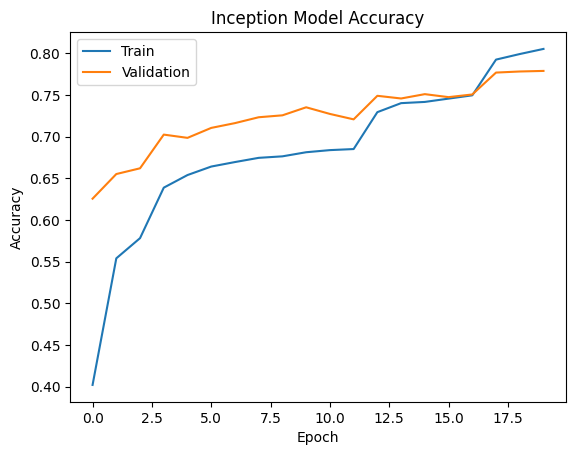

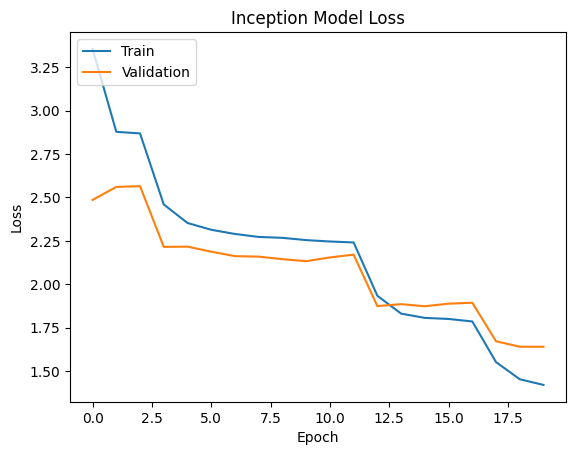

In [105]:

# Plot training & validation accuracy values for the best Inception model
plt.plot(history_inception.history['accuracy'])
plt.plot(history_inception.history['val_accuracy'])
plt.title('Inception Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for the best Inception model
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('Inception Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Validation accuracy was higher than training first, it kept on gradually increasing but the rate of increase of training was higher. At the end of 20epochs training accuracy was 0.80 and validation accuracy was 0.78. Training accuracy had more rate of increase till 5 epochs then it slowed down. The loss of both training and validation was close with validation having a lower starting loss and training having a higher starting loss. They both gradually decrease but do show a linear decrease.

In [107]:
from tensorflow.keras.metrics import Precision, Recall

pre_inception = Precision()
re_inception = Recall()

with tf.device('/device:GPU:0'):
    for batch in range(len(test_generator)):
        X, y = test_generator[batch]
        y_pred = inception_model.predict(X)

        # Update metric states
        pre_inception.update_state(y, y_pred)
        re_inception.update_state(y, y_pred)

# Get the final results after processing all batches
precision_inception = pre_inception.result().numpy()
recall_inception = re_inception.result().numpy()

print(f"Inception Model Precision: {precision_inception:.4f}")
print(f"Inception Model Recall: {recall_inception:.4f}")


1/1 [==============================] - 1s 1s/step
Inception Model Precision: 0.8545
Inception Model Recall: 0.7237


>1. Test Accuracy (77.36%):
>
>* The model achieves a commendable test accuracy of 77.36%, indicating its ability to correctly classify instances on a previously unseen test set.
>2. Precision (0.8545):
>
>* Precision is high at 85.45%, implying that when the model predicts a positive outcome, it is correct about 85.45% of the time. This indicates a relatively low rate of false positives.
>3. Recall (0.7237):
>
>* Recall (sensitivity) is at 72.37%, signifying that the model is able to correctly identify about 72.37% of all actual positive instances. This suggests a moderate rate of true positives and a higher rate of false negatives.

In summary, the fourth InceptionV3-based model outperforms the third model in terms of overall accuracy and precision, highlighting its effectiveness in correctly classifying instances, especially with a reduced false positive rate.

## Model Comparison

In [110]:
import pandas as pd

# Define the models and their results
models = ["CNN", "MobileNet", "VGG16", "InceptionV3"]
recall = [recall_base, recall_mNet, recall_vgg16, recall_inception]
precision = [precision_base, precision_mNet, precision_vgg16, precision_inception]
test_loss = [test_loss_base, test_loss_mNet, test_loss_vgg16, test_loss_inception]
test_accuracy = [test_acc_base, test_acc_mNet, test_acc_vgg16, test_acc_inception]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'Recall': recall,
    'Precision': precision,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum loss, maximum accuracy, precision, and recall values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['Test Loss'].min():
            style += 'background-color: rgba(255, 0, 0, 0.3); color: black; font-weight: bold;'
        if val == results['Test Accuracy'].max():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['Precision'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
        if val == results['Recall'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results


,Model,Recall,Precision,Test Loss,Test Accuracy
Model no.,,,,,
1,CNN,0.543637,0.747235,1.919625,0.599801
2,MobileNet,0.830511,0.892099,1.518972,0.850586
3,VGG16,0.624320,0.819553,2.379272,0.683396
4,InceptionV3,0.723699,0.854519,1.651152,0.773581


* Recall and Precision: Model 2 (MobileNet) demonstrates the highest recall (83.05%) and precision (89.21%), indicating a good balance between correctly identifying positive instances and minimizing false positives.
* Test Accuracy: Model 2 (MobileNet) also achieves the highest test accuracy (85.06%), showcasing its overall effectiveness.
* Model Performance: InceptionV3 (Model 4) and VGG16 (Model 3) exhibit competitive performance, while the Base CNN model (Model 1) lags behind in both recall and precision.

The MobileNet model (Model 2) stands out with the highest recall (83.05%) and precision (89.21%), demonstrating its effectiveness in correctly identifying positive instances while minimizing false positives. In terms of test accuracy, the MobileNet model also leads, achieving an accuracy of 85.06%. In contrast, the VGG16 model (Model 3) exhibits lower recall (62.43%) and precision (81.96%), resulting in a comparatively lower test accuracy of 68.34%. The InceptionV3 model (Model 4) shows balanced performance with a recall of 72.37% and precision of 85.45%, contributing to a test accuracy of 77.36%. The CNN model (Model 1) lags behind in recall (54.36%) and precision (74.72%), yielding the lowest test accuracy at 59.98%. Overall, these results highlight the diverse performance characteristics of the models, with MobileNet emerging as the most robust performer in this evaluation.

## Conclusion

In our bird classification project with a massive dataset of 524 bird species, we used data generators to handle the large amount of data efficiently. These generators allowed us to load and process batches of images during training without overloading our computer's memory. We also normalized the images to make sure they all had consistent pixel values, helping the model learn better.

The standout performer among the different models was MobileNet. Its lightweight design and ability to capture detailed features in images made it the top choice. The results consistently showed higher accuracy, recall, and precision with MobileNet compared to other models.

Model selection plays a major role in classification as some models may fail to capture the full complexity of data. It was seen that mobileNet even though light-weight was able to efficiently capture details and classify images properly in a very huge dataset.
